In [70]:
# all tags for which tweets were collected

tags = ["Look Beneath the Surface AND trafficking", "Blue Blindfold", "Blue Blindfold Campaign", "Blue Heart AND trafficking", "Stop the Traffik", "#STOPTHETRAFFIK", "PACTottawa", "#NoRoomForTrafficking", "#CanYouSeeMe AND trafficking", "#FreedomHappensNow AND trafficking", "DontCreateMoreOrphans", "#WearBlueDay",  "#StopOrphanageTourism", "ChildrenAreNotTouristAttractions AND trafficking",
         "#THINKfamilies", "DontCreateMoreOrphans AND trafficking", "KeepingFamiliesTogether", "#HelpingNotHelping", "#EndOrphanageTourism", "#COUNTALLCHILDREN", "#endslavery AND trafficking", "#FreedomHappensNow AND trafficking", "#EndSlaveryCanada AND trafficking", "#myfreedomday AND trafficking", "#NoRoomForTrafficking", "#Knowthesigns AND trafficking", "#EndHumanTrafficking", "#endtrafficking", "#humantrafficking"]

In [71]:
# code to generate number of tweets

import time 

tweet_count = dict()
def tweet_counter(tag,tweet_count):
    file = tag.replace(" ","") + ".csv"
    with open(file,"r") as f:
        datum = f.read()
        datum = datum.splitlines()
    tweet_count[tag] = len(datum)

tic = time.time()        
for word in tags:
    tweet_counter(word,tweet_count)
toc = time.time()
print("Time required to count tweets and generate dict:",toc-tic,"secs\n")

# sorting dictionary based on number of tweets using dictionary comprehension
# leveraging the fact that insertion order is preserved in dict (post python 3.7+)
tweet_count = {k: v for k, v in sorted(tweet_count.items(), key = lambda item: item[1])}
for tag,num in tweet_count.items():
    print(tag,num)


Time required to count tweets and generate dict: 0.7556068897247314 secs

DontCreateMoreOrphans AND trafficking 1
#EndSlaveryCanada AND trafficking 1
ChildrenAreNotTouristAttractions AND trafficking 3
DontCreateMoreOrphans 6
#StopOrphanageTourism 28
Blue Blindfold Campaign 84
#EndOrphanageTourism 86
#NoRoomForTrafficking 213
#FreedomHappensNow AND trafficking 241
#COUNTALLCHILDREN 416
Look Beneath the Surface AND trafficking 469
#CanYouSeeMe AND trafficking 794
#THINKfamilies 1181
PACTottawa 1358
Blue Heart AND trafficking 1650
#myfreedomday AND trafficking 1926
#Knowthesigns AND trafficking 2045
#HelpingNotHelping 3631
#STOPTHETRAFFIK 7409
Blue Blindfold 7445
#WearBlueDay 21003
KeepingFamiliesTogether 22584
Stop the Traffik 23955
#endslavery AND trafficking 25854
#endtrafficking 32843
#humantrafficking 34797
#EndHumanTrafficking 48961


In [72]:
# List of tags to be discarded

discarded = list()
threshold = 100
for tag,num in tweet_count.items():
    if num < threshold:
        discarded.append(tag)
print(discarded)

['DontCreateMoreOrphans AND trafficking', '#EndSlaveryCanada AND trafficking', 'ChildrenAreNotTouristAttractions AND trafficking', 'DontCreateMoreOrphans', '#StopOrphanageTourism', 'Blue Blindfold Campaign', '#EndOrphanageTourism']


In [73]:
# List of tags for whom timelines are supposed to be generated
consider = [word for word in tags if word not in discarded]
print(consider)
print(len(consider))

['Look Beneath the Surface AND trafficking', 'Blue Blindfold', 'Blue Heart AND trafficking', 'Stop the Traffik', '#STOPTHETRAFFIK', 'PACTottawa', '#NoRoomForTrafficking', '#CanYouSeeMe AND trafficking', '#FreedomHappensNow AND trafficking', '#WearBlueDay', '#THINKfamilies', 'KeepingFamiliesTogether', '#HelpingNotHelping', '#COUNTALLCHILDREN', '#endslavery AND trafficking', '#FreedomHappensNow AND trafficking', '#myfreedomday AND trafficking', '#NoRoomForTrafficking', '#Knowthesigns AND trafficking', '#EndHumanTrafficking', '#endtrafficking', '#humantrafficking']
22


In [74]:
# to generate timeline data

import pandas as pd
import time 

# main dict (will be called data later)
# data type of main dict = {campgaign(str), small dict}
# key: string, value: dict

# data type of small dict = { (month,year) , number of tweets }
# key: tuple, value: int

# data[tag] is contains ALL info about the tag

# function to generate timeline data
def get_timeline_data(tag):
    file = tag.replace(" ","") + ".csv"
    df = pd.read_csv(file,engine = "python")
    d = dict()
    visited = list()
    for date in df["date"]:
        try:
            year = date[:4]
            month = date[5:7]
            # (month,year) is a tuple
            if ((month,year)) in visited:
                d[(month,year)] += 1
            else:
                # initialization of (month,year) in the dictionary
                visited.append((month,year))
                d[(month,year)] = 1
        except:
            continue
    # storing in sorted order (SORTING THE DICTIONARY)
    d = {k: v for k, v in sorted(d.items(), key = lambda item: item[0][1] + item[0][0])}
    return d


# problematic ones:
# "Blue Blindfold" "Blue Heart AND trafficking", "Stop the Traffik" "#STOPTHETRAFFIK","#endslavery AND trafficking", 
# had to be resolved later



In [75]:
# code to invoke the function get_timeline_data() and store content in data {}

data = dict()
# word = "Blue Blindfold"
# data[word] = get_timeline_data(word)
tic = time.time()
for word in consider:
    data[word] = get_timeline_data(word)
toc = time.time()
print("Time required to generate timeline data:",toc-tic,"secs")


Time required to generate timeline data: 2.856767177581787 secs


In [76]:
# code to print timeline data

def print_data(tag):
    d = data[tag]
    print("\nData of",tag,":\n\n")
    print("Note: each element is of the form: (mm,yyyy), no. of tweets\n\n")
    print(d)

# for word in consider:
#     print(word)

# an example
# print_data("Blue Blindfold")
print_data("#humantrafficking")



Data of #humantrafficking :


Note: each element is of the form: (mm,yyyy), no. of tweets


{('03', '2021'): 4451, ('04', '2021'): 5549}


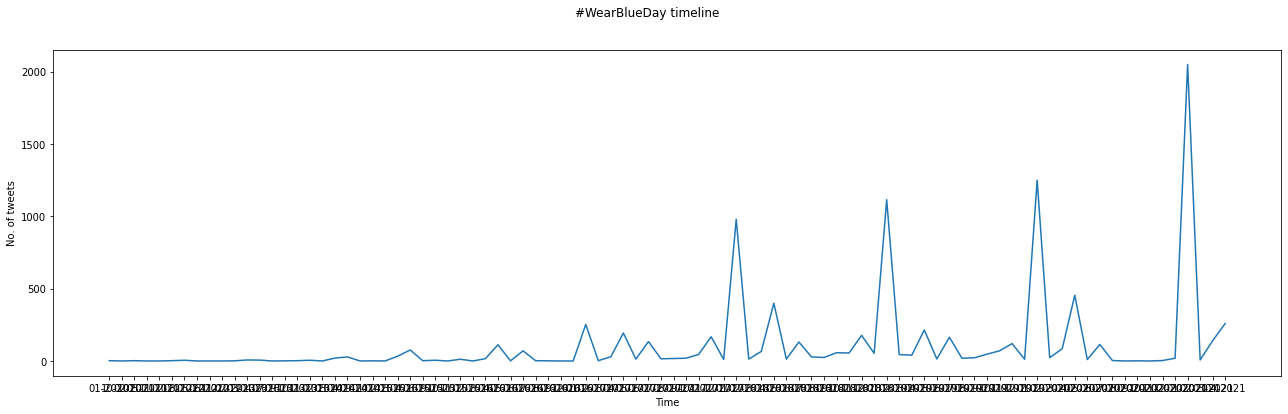

In [77]:
# code to generate timeline

import pandas as pd 
import matplotlib.pyplot as plt

# function to generate timeline of a particular tag
def timeline(tag, data):
    d = data[tag]
    values = list(d.values())
    time_stamps = [key[0] + "-" + key[1] for key in d.keys()]
    plt.figure(figsize=(22, 6))
    plt.plot(time_stamps,values)
    plt.ylabel("No. of tweets")
    plt.xlabel("Time")
    plt.suptitle(tag + " timeline")
    # plt.savefig(tag + " timeline.png")

# tag = "#endtrafficking"
# tag = "Blue Blindfold"
# tag = "#COUNTALLCHILDREN" 
tag = "#WearBlueDay"
timeline(tag,data)

# Tags for which timelines are to be generated
# for word in consider:
#     timeline(word,data)


In [78]:
# Concept explained: generating a sorted dictionary using dictionary comprehension

# d = {k: v for k, v in sorted(d.items(), key = lambda item: item[0][1] + item[0][0])}
# item[0][1] -> year (type: string)
# item[0][0] -> month (type: string)
# i.e sort on the basis of year and then month
# print(d)